In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [40]:
# open the benign captures from the IOT devices
amazon_echo = pd.read_pickle('Datasets/IOT23/Benign-Amazon-Echo/zeek_normal.pkl')
phillips_hue = pd.read_pickle('Datasets/IOT23/Benign-Phillips-HUE/zeek_normal.pkl')
soomfy_doorlock = pd.read_pickle('Datasets/IOT23/Benign-Soomfy-Doorlock/zeek_normal.pkl')

## Amazon Echo

In [41]:
amazon_echo.head()

,date,src_ip,src_port,dst_ip,dst_port,protocol,duration,state,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,label,detailed_label,protocol_num,state_num
0,2018-09-21 09:40:22.965529919,0.0.0.0,68,255.255.255.255,67,udp,8.322388,S0,0,2,656,0,0,benign,missing,0,0
1,2018-09-21 09:40:26.845520020,192.168.2.1,57621,192.168.2.255,57621,udp,19576.598629,S0,0,617,44424,0,0,benign,missing,0,0
2,2018-09-21 09:41:37.732295036,192.168.2.1,5353,224.0.0.251,5353,udp,7.628973,S0,0,1,391,0,0,benign,missing,0,0
3,2018-09-21 09:41:37.732373953,fe80::80e6:50ff:fe12:1464,5353,ff02::fb,5353,udp,7.628974,S0,0,1,411,0,0,benign,missing,0,0
4,2018-09-21 09:41:37.732506990,169.254.15.115,5353,224.0.0.251,5353,udp,7.369418,S0,0,1,391,0,0,benign,missing,0,0


In [42]:
# show some statistics on the numerical features for each type of data
continuous_features = ['duration', 'protocol_num', 'state_num', 'missed_bytes', 'orig_packets', 'orig_ip_bytes', 'resp_packets', 'resp_ip_bytes', 'src_port', 'dst_port']

In [43]:
amazon_echo[continuous_features].describe()

,duration,protocol_num,state_num,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,src_port,dst_port
count,1374.000000,1374.000000,1374.000000,1374.0,1374.000000,1.374000e+03,1374.000000,1.374000e+03,1374.000000,1374.000000
mean,76.559375,0.475983,1.544396,0.0,103.873362,8.794371e+03,185.092431,2.600232e+05,28292.233624,1073.914119
std,646.878562,0.612273,2.089894,0.0,3343.205784,1.967368e+05,6463.852208,9.432581e+06,21448.604753,3270.789519
min,0.000010,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,8.000000,0.000000
25%,0.015156,0.000000,0.000000,0.0,1.000000,7.400000e+01,0.000000,0.000000e+00,5353.000000,53.000000
50%,0.243638,0.000000,1.000000,0.0,2.000000,2.160000e+02,1.000000,8.400000e+01,34930.000000,80.000000
75%,58.109089,1.000000,1.000000,0.0,9.000000,8.400000e+02,2.000000,1.390000e+02,47091.250000,443.000000
max,19576.598629,2.000000,9.000000,0.0,123657.000000,6.527241e+06,239484.000000,3.496187e+08,64769.000000,57621.000000


## Host level analysis

### Bytes and packets statistics per host

In [44]:
amazon_grouped_source_ip_pb = amazon_echo.groupby('src_ip').agg({'orig_packets': ['count', 'mean', 'max', 'min', 'std'], 'orig_ip_bytes': ['mean', 'max', 'min', 'std'], 'resp_packets': ['mean', 'max', 'min', 'std'], 'resp_ip_bytes': ['mean', 'max', 'min', 'std']})
amazon_grouped_source_ip_pb.columns = ['count', 'orig_packets_mean', 'orig_packets_max', 'orig_packets_min', 'orig_packets_std', 'orig_ip_bytes_mean', 'orig_ip_bytes_max', 'orig_ip_bytes_min', 'orig_ip_bytes_std', 'resp_packets_mean', 'resp_packets_max', 'resp_packets_min', 'resp_packets_std', 'resp_ip_bytes_mean', 'resp_ip_bytes_max', 'resp_ip_bytes_min', 'resp_ip_bytes_std']
amazon_grouped_source_ip_pb = amazon_grouped_source_ip_pb.sort_values(by=['count'], ascending=False).reset_index()
amazon_grouped_source_ip_pb

,src_ip,count,orig_packets_mean,orig_packets_max,orig_packets_min,orig_packets_std,orig_ip_bytes_mean,orig_ip_bytes_max,orig_ip_bytes_min,orig_ip_bytes_std,resp_packets_mean,resp_packets_max,resp_packets_min,resp_packets_std,resp_ip_bytes_mean,resp_ip_bytes_max,resp_ip_bytes_min,resp_ip_bytes_std
0,192.168.2.3,979,142.687436,123657,0,3960.508469,11583.753830,6527241,0,233040.613640,259.766088,239484,0,7657.471116,364934.017365,349618679,0,1.117454e+07
1,0.0.0.0,153,10.058824,22,2,1.204352,3299.333333,7219,656,395.255131,0.000000,0,0,0.000000,0.000000,0,0,0.000000e+00
2,192.168.2.1,51,15.000000,617,1,86.009302,1455.137255,44424,77,6151.040114,0.000000,0,0,0.000000,0.000000,0,0,0.000000e+00
3,169.254.15.115,51,2.901961,11,1,2.100047,596.411765,1637,77,407.623266,0.000000,0,0,0.000000,0.000000,0,0,0.000000e+00
4,fe80::80e6:50ff:fe12:1464,50,2.960000,11,1,2.156717,654.960000,1857,97,454.778796,0.000000,0,0,0.000000,0.000000,0,0,0.000000e+00
5,fe80::482:6d20:b3e:adf4,15,3.933333,32,1,7.878240,1006.000000,9988,72,2516.744666,0.200000,1,0,0.414039,12.800000,64,0,2.649852e+01
6,fe80::4eef:c0ff:fe27:561e,12,3.833333,17,1,4.687184,477.750000,2634,137,745.999284,0.000000,0,0,0.000000,0.000000,0,0,0.000000e+00
7,fe80::1847:a1bd:8d13:f43c,8,2.375000,4,1,0.916125,391.875000,703,114,217.554878,0.000000,0,0,0.000000,0.000000,0,0,0.000000e+00
8,192.168.69.73,7,2.142857,3,1,1.069045,420.714286,643,94,212.897248,0.000000,0,0,0.000000,0.000000,0,0,0.000000e+00
9,192.168.69.192,7,4.571429,18,0,6.187545,1335.714286,5919,0,2073.223393,0.285714,2,0,0.755929,164.571429,1152,0,4.354151e+02


### Duration and avg time difference between flows per host

In [46]:
amazon_grouped_source_ip_time = amazon_echo.groupby('src_ip').agg({'duration': ['count', 'mean', 'max', 'min', 'std'], 'date': [lambda group: group.sort_values().diff().mean(), lambda group: group.sort_values().diff().max(), lambda group: group.sort_values().diff().min(), lambda group: group.sort_values().diff().std()]})
amazon_grouped_source_ip_time.columns = ['count', 'duration_mean', 'duration_max', 'duration_min', 'duration_std', 'mean_time_diff', 'max_time_diff', 'min_time_diff', 'std_time_diff']
amazon_grouped_source_ip_time = amazon_grouped_source_ip_time.sort_values(by=['count'], ascending=False).reset_index()
amazon_grouped_source_ip_time

,src_ip,count,duration_mean,duration_max,duration_min,duration_std,mean_time_diff,max_time_diff,min_time_diff,std_time_diff
0,192.168.2.3,979,75.956159,11851.214389,0.000010,444.313429,00:00:18.253228,00:04:59.807264,00:00:00.000002,00:00:52.627639
1,0.0.0.0,153,60.147332,188.262180,8.322388,11.623248,00:02:08.403643,00:04:16.724261,00:01:16.533275,00:00:11.309331
2,192.168.2.1,51,391.334260,19576.598629,0.100990,2740.205736,00:06:30.492747,00:15:09.969765,00:00:13.036051,00:05:42.370194
3,169.254.15.115,51,7.369418,20.411436,0.100984,3.382637,00:06:29.075011,00:15:09.969779,00:00:13.036313,00:05:43.746615
4,fe80::80e6:50ff:fe12:1464,50,7.628974,20.411316,0.100977,3.249482,00:06:37.015317,00:15:09.969743,00:00:13.036051,00:05:42.765028
5,fe80::482:6d20:b3e:adf4,15,4.018468,17.250803,0.002716,5.666301,00:00:08.976808,00:00:34.626947,00:00:00.000001,00:00:13.377206
6,fe80::4eef:c0ff:fe27:561e,12,23.593763,38.175279,7.550691,8.873173,00:09:51.893625,01:43:24.293062,00:00:00.001798,00:31:01.571964
7,fe80::1847:a1bd:8d13:f43c,8,9.554011,59.390351,1.023844,20.155887,00:00:17.232763,00:00:34.509592,00:00:00.000735,00:00:14.479750
8,192.168.69.73,7,2.896521,4.094252,0.000010,1.390858,00:00:20.445888,00:00:34.403316,00:00:00.105968,00:00:13.506459
9,192.168.69.192,7,6.466902,13.654073,1.038254,5.414228,00:00:20.706823,00:00:39.574230,00:00:00.688812,00:00:15.593624


### Destination ips and ports, as well as protocols statistics per flow

In [47]:
amazon_grouped_source_ip_net = amazon_echo.groupby('src_ip').agg({'dst_ip': ['count', 'nunique'], 'src_port': 'nunique', 'dst_port': 'nunique', 'protocol': 'nunique'})
amazon_grouped_source_ip_net.columns = ['count', 'number of unique destination ips', 'number of unique source ports', 'number of unique destination ports', 'number of unique protocols']
amazon_grouped_source_ip_net = amazon_grouped_source_ip_net.sort_values(by=['count'], ascending=False).reset_index()
amazon_grouped_source_ip_net

,src_ip,count,number of unique destination ips,number of unique source ports,number of unique destination ports,number of unique protocols
0,192.168.2.3,979,120,763,7,3
1,0.0.0.0,153,1,1,1,1
2,192.168.2.1,51,2,2,2,1
3,169.254.15.115,51,1,1,1,1
4,fe80::80e6:50ff:fe12:1464,50,1,1,1,1
5,fe80::482:6d20:b3e:adf4,15,6,5,5,2
6,fe80::4eef:c0ff:fe27:561e,12,3,3,3,2
7,fe80::1847:a1bd:8d13:f43c,8,2,2,2,2
8,192.168.69.73,7,2,1,1,1
9,192.168.69.192,7,2,2,2,1


### Now let's keep only the ip with the greatest number of flows 

In [48]:
amazon_echo_ip = amazon_echo[amazon_echo['src_ip'] == '192.168.2.3'].reset_index(drop=True)
amazon_echo_ip['orig_packets_per_s'] = amazon_echo_ip['orig_packets'] / amazon_echo_ip['duration']
amazon_echo_ip['resp_packets_per_s'] = amazon_echo_ip['resp_packets'] / amazon_echo_ip['duration']
amazon_echo_ip['orig_bytes_per_s'] = amazon_echo_ip['orig_ip_bytes'] / amazon_echo_ip['duration']
amazon_echo_ip['resp_bytes_per_s'] = amazon_echo_ip['resp_ip_bytes'] / amazon_echo_ip['duration']
amazon_echo_ip

,date,src_ip,src_port,dst_ip,dst_port,protocol,duration,state,missed_bytes,orig_packets,...,resp_packets,resp_ip_bytes,label,detailed_label,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s
0,2018-09-21 09:52:28.881175041,192.168.2.3,68,192.168.2.1,67,udp,0.004204,SHR,0,0,...,2,656,benign,missing,0,4,0.000000,475.737393,0.000000,156041.864891
1,2018-09-21 09:52:29.066996098,192.168.2.3,5353,224.0.0.251,5353,udp,38.595360,S0,0,29,...,0,0,benign,missing,0,0,0.751386,0.000000,121.776296,0.000000
2,2018-09-21 09:52:29.331990957,192.168.2.3,59744,192.168.2.1,53,udp,0.011518,SF,0,1,...,1,139,benign,missing,0,1,86.820629,86.820629,6164.264629,12068.067373
3,2018-09-21 09:52:29.337398052,192.168.2.3,55971,192.168.2.1,53,udp,0.015621,SF,0,1,...,1,84,benign,missing,0,1,64.016388,64.016388,4353.114397,5377.376608
4,2018-09-21 09:52:29.337702036,192.168.2.3,41548,192.168.2.1,53,udp,0.015581,SF,0,1,...,1,132,benign,missing,0,1,64.180733,64.180733,4364.289840,8471.856749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,2018-09-21 14:48:46.339190006,192.168.2.3,55013,176.32.98.203,80,tcp,0.228273,SF,0,4,...,4,406,benign,missing,1,1,17.522878,17.522878,1379.926667,1778.572148
975,2018-09-21 14:48:46.339195967,192.168.2.3,34940,176.32.98.203,80,tcp,0.230678,SF,0,4,...,4,539,benign,missing,1,1,17.340188,17.340188,1460.910880,2336.590399
976,2018-09-21 14:50:00.492599010,192.168.2.3,47764,192.168.2.1,53,udp,0.013025,SF,0,1,...,1,90,benign,missing,0,1,76.775432,76.775432,5681.381958,6909.788868
977,2018-09-21 14:50:00.492607117,192.168.2.3,51044,52.46.156.47,443,tcp,0.107446,RSTR,0,2,...,1,40,benign,missing,1,5,18.614001,9.307001,1237.831097,372.280029


In [49]:
amazon_echo_ip.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s
count,979.000000,979.000000,979.000000,979.0,979.000000,9.790000e+02,979.000000,9.790000e+02,979.000000,979.000000,979.000000,979.000000,9.790000e+02,9.790000e+02
mean,38260.986721,165.898876,75.956159,0.0,142.687436,1.158375e+04,259.766088,3.649340e+05,0.614913,2.083759,6617.631435,78.135146,5.028303e+05,9.107289e+03
std,16823.584864,515.532450,444.313429,0.0,3960.508469,2.330406e+05,7657.471116,1.117454e+07,0.599780,2.209186,24710.392826,197.378297,1.878017e+06,4.929462e+04
min,8.000000,0.000000,0.000010,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,33407.000000,53.000000,0.012434,0.0,1.000000,6.800000e+01,1.000000,7.600000e+01,0.000000,1.000000,2.828787,0.019992,3.969520e+02,3.421942e+00
50%,40663.000000,80.000000,0.118298,0.0,1.000000,7.600000e+01,1.000000,1.120000e+02,1.000000,1.000000,17.646877,15.169615,1.536827e+03,1.636959e+03
75%,50424.500000,123.000000,3.330390,0.0,4.000000,3.370000e+02,4.000000,5.390000e+02,1.000000,3.000000,93.725277,80.570508,6.474512e+03,7.705686e+03
max,64769.000000,5353.000000,11851.214389,0.0,123657.000000,6.527241e+06,239484.000000,3.496187e+08,2.000000,9.000000,100000.000000,2136.752137,7.600000e+06,1.421281e+06


### Duration against time for 192.168.2.3

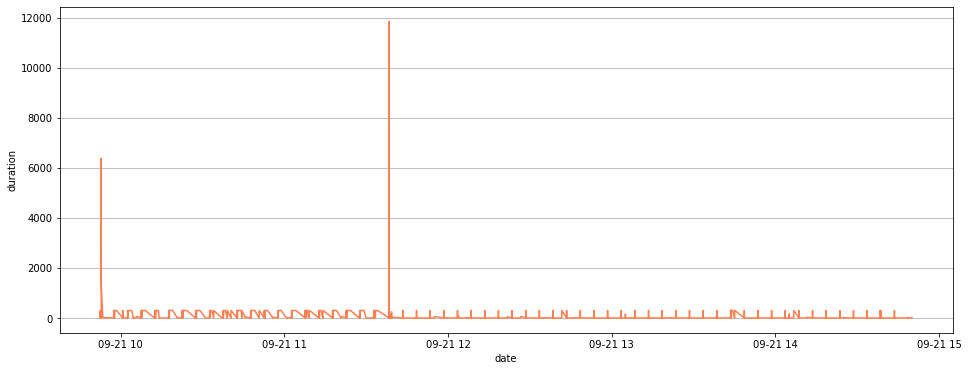

In [50]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="duration", data=amazon_echo_ip, color="coral")
plt.grid(axis='y')

### Number of bytes against time for 192.168.2.3

Text(0, 0.5, 'Number of bytes')

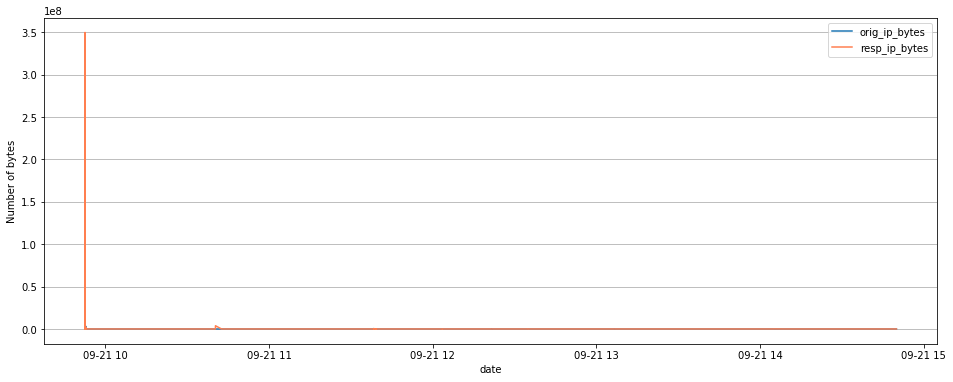

In [51]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_ip_bytes", data=amazon_echo_ip, label='orig_ip_bytes')
sns.lineplot(x="date", y="resp_ip_bytes", data=amazon_echo_ip, label='resp_ip_bytes', color="coral")
plt.grid(axis='y')
plt.ylabel("Number of bytes")

### Number of packets against time for 192.168.2.3

Text(0, 0.5, 'Number of packets')

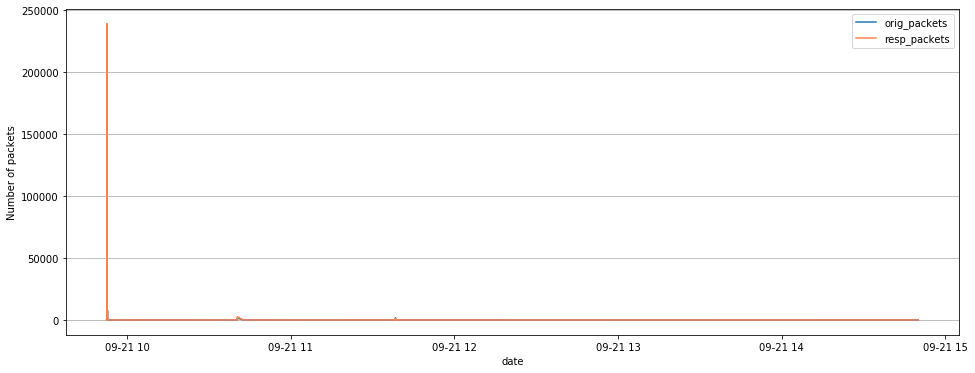

In [52]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets", data=amazon_echo_ip, label='orig_packets')
sns.lineplot(x="date", y="resp_packets", data=amazon_echo_ip, label='resp_packets', color="coral")
plt.grid(axis='y')
plt.ylabel("Number of packets")

### Originator's Packets/sec against Bytes/sec for 192.168.2.3

Text(0, 0.5, 'Originating Packets / sec')

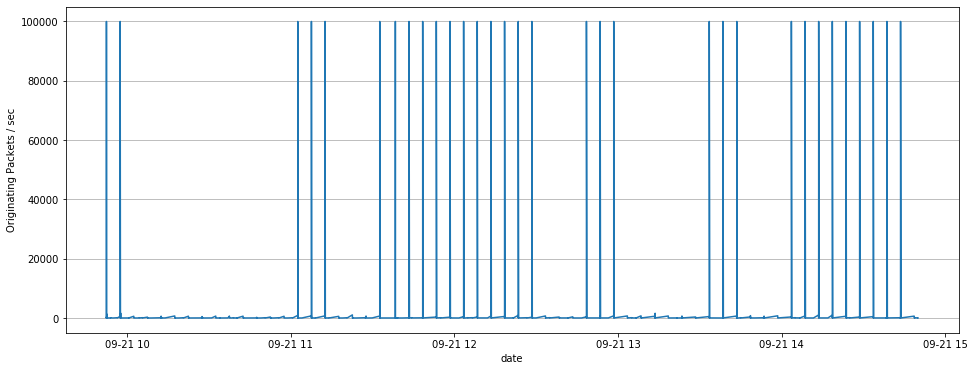

In [53]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets_per_s", data=amazon_echo_ip)
plt.grid(axis='y')
plt.ylabel("Originating Packets / sec")

Text(0, 0.5, 'Originating Bytes / sec')

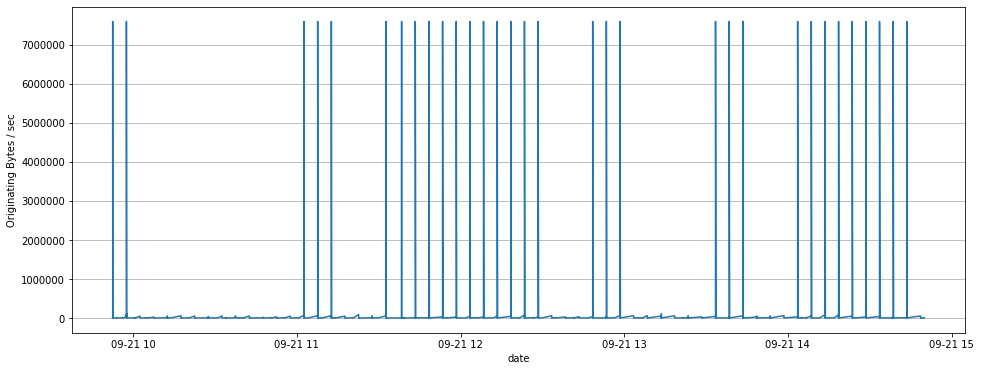

In [54]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_bytes_per_s", data=amazon_echo_ip)
plt.grid(axis='y')
plt.ylabel("Originating Bytes / sec")

### Responder's Packets/s against Bytes/sec for 192.168.2.3

Text(0, 0.5, "Responder's Packets / sec")

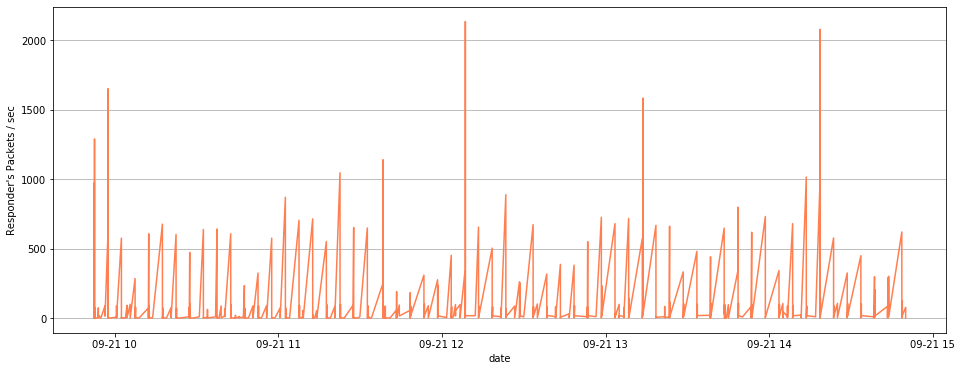

In [55]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="resp_packets_per_s", data=amazon_echo_ip, color="coral")
plt.grid(axis='y')
plt.ylabel("Responder's Packets / sec")

Text(0, 0.5, "Responder's Bytes / sec")

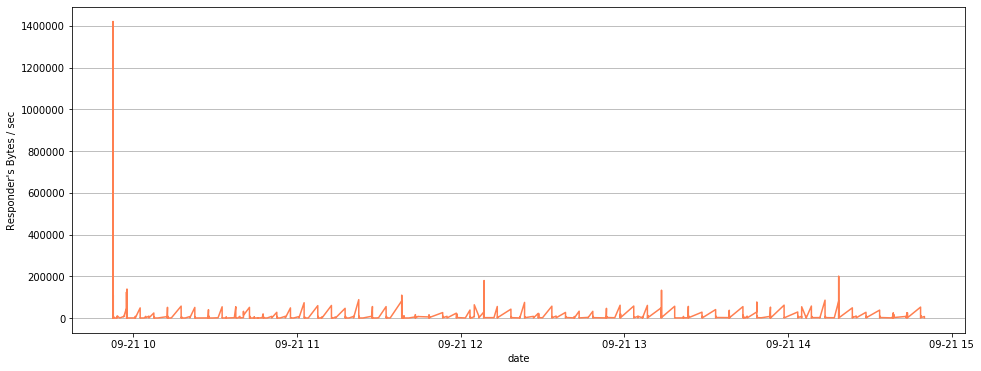

In [56]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="resp_bytes_per_s", data=amazon_echo_ip, color="coral")
plt.grid(axis='y')
plt.ylabel("Responder's Bytes / sec")

### Protocol type distribution

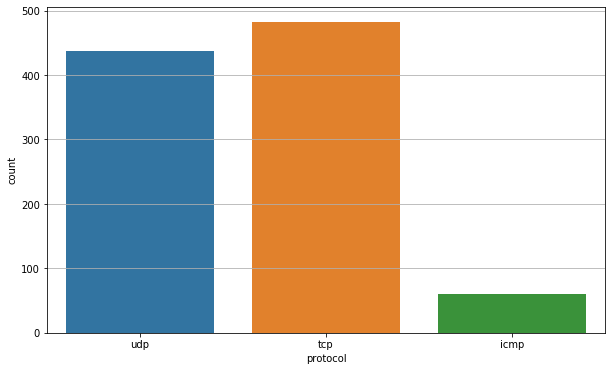

In [59]:
plt.figure(figsize=(10, 6))
sns.countplot(x="protocol", data=amazon_echo_ip)
plt.grid(axis='y')

### Packets transferred per protocol

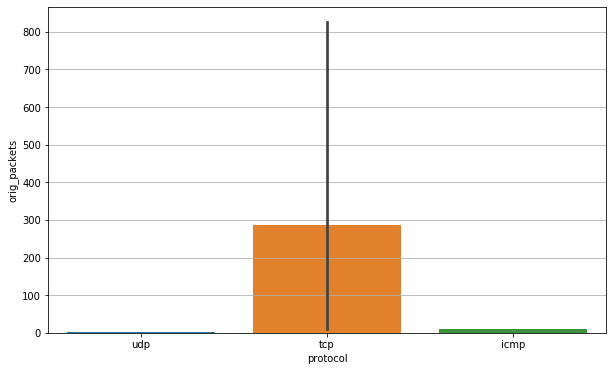

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="orig_packets", data=amazon_echo_ip)
plt.grid(axis='y')

### Packets received per protocol 

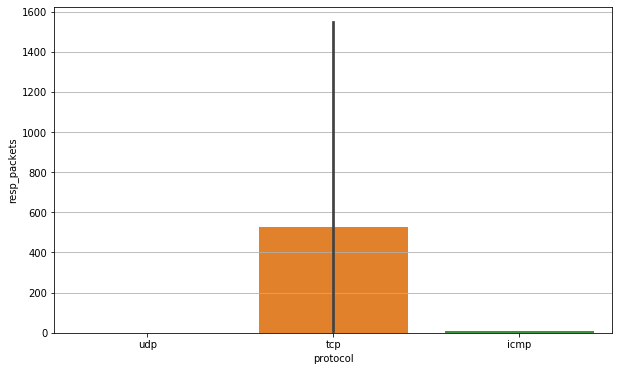

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="resp_packets", data=amazon_echo_ip)
plt.grid(axis='y')

### Bytes transferred per protocol

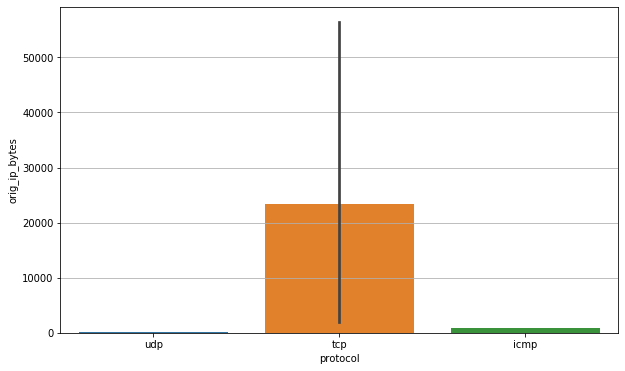

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="orig_ip_bytes", data=amazon_echo_ip)
plt.grid(axis='y')

### Bytes received per protocol

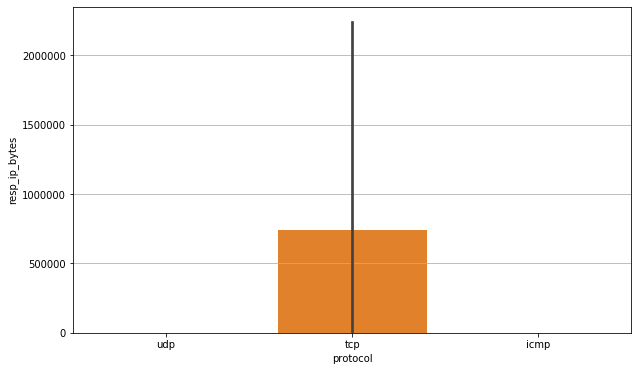

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="resp_ip_bytes", data=amazon_echo_ip)
plt.grid(axis='y')

## Connection level analysis

### Packets and bytes statistics per connection

In [68]:
amazon_grouped_connection_pb = amazon_echo.groupby(['src_ip', 'dst_ip']).agg({'orig_packets': ['count', 'mean', 'max', 'min', 'std'], 'orig_ip_bytes': ['mean', 'max', 'min', 'std'], 'resp_packets': ['mean', 'max', 'min', 'std'], 'resp_ip_bytes': ['mean', 'max', 'min', 'std']})
amazon_grouped_connection_pb.columns = ['count', 'orig_packets_mean', 'orig_packets_max', 'orig_packets_min', 'orig_packets_std', 'orig_ip_bytes_mean', 'orig_ip_bytes_max', 'orig_ip_bytes_min', 'orig_ip_bytes_std', 'resp_packets_mean', 'resp_packets_max', 'resp_packets_min', 'resp_packets_std', 'resp_ip_bytes_mean', 'resp_ip_bytes_max', 'resp_ip_bytes_min', 'resp_ip_bytes_std']
amazon_grouped_connection_pb = amazon_grouped_connection_pb.sort_values(by=['count'], ascending=False).reset_index()
amazon_grouped_connection_pb

,src_ip,dst_ip,count,orig_packets_mean,orig_packets_max,orig_packets_min,orig_packets_std,orig_ip_bytes_mean,orig_ip_bytes_max,orig_ip_bytes_min,orig_ip_bytes_std,resp_packets_mean,resp_packets_max,resp_packets_min,resp_packets_std,resp_ip_bytes_mean,resp_ip_bytes_max,resp_ip_bytes_min,resp_ip_bytes_std
0,192.168.2.3,192.168.2.1,363,2.482094,10,0,3.350861,196.702479,840,0,286.732477,2.493113,10,1,3.345952,230.449036,840,76,275.622459
1,0.0.0.0,255.255.255.255,153,10.058824,22,2,1.204352,3299.333333,7219,656,395.255131,0.000000,0,0,0.000000,0.000000,0,0,0.000000
2,192.168.2.3,72.21.192.213,64,1.000000,1,1,0.000000,76.000000,76,76,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000
3,192.168.2.3,93.184.216.34,63,4.015873,5,4,0.125988,216.825397,268,216,6.551384,2.063492,4,2,0.304431,115.492063,228,112,17.084112
4,192.168.2.3,207.171.178.6,56,1.000000,1,1,0.000000,76.000000,76,76,0.000000,0.517857,1,0,0.504203,39.357143,76,0,38.319437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,192.168.2.3,52.216.233.179,1,59.000000,59,59,NaN,3505.000000,3505,3505,NaN,56.000000,56,56,NaN,64465.000000,64465,64465,NaN
164,192.168.2.3,52.216.230.235,1,8.000000,8,8,NaN,632.000000,632,632,NaN,6.000000,6,6,NaN,1027.000000,1027,1027,NaN
165,192.168.2.3,52.216.227.0,1,8.000000,8,8,NaN,632.000000,632,632,NaN,6.000000,6,6,NaN,1027.000000,1027,1027,NaN
166,192.168.2.3,52.216.18.80,1,8.000000,8,8,NaN,632.000000,632,632,NaN,6.000000,6,6,NaN,1027.000000,1027,1027,NaN


### Duration statistics per connection

In [69]:
amazon_grouped_connection_time = amazon_echo.groupby(['src_ip', 'dst_ip']).agg({'duration': ['count', 'mean', 'max', 'min', 'std'], 'date': [lambda group: group.sort_values().diff().mean(), lambda group: group.sort_values().diff().max(), lambda group: group.sort_values().diff().min(), lambda group: group.sort_values().diff().std()]})
amazon_grouped_connection_time.columns = ['count', 'duration_mean', 'duration_max', 'duration_min', 'duration_std', 'mean_time_diff', 'max_time_diff', 'min_time_diff', 'std_time_diff']
amazon_grouped_connection_time = amazon_grouped_connection_time.sort_values(by=['count'], ascending=False).reset_index()
amazon_grouped_connection_time

,src_ip,dst_ip,count,duration_mean,duration_max,duration_min,duration_std,mean_time_diff,max_time_diff,min_time_diff,std_time_diff
0,192.168.2.3,192.168.2.1,363,0.017241,0.189103,0.000468,0.017545,00:00:49.313843,00:05:32.742849,00:00:00.000004,00:01:30.387201
1,0.0.0.0,255.255.255.255,153,60.147332,188.262180,8.322388,11.623248,00:02:08.403643,00:04:16.724261,00:01:16.533275,00:00:11.309331
2,192.168.2.3,72.21.192.213,64,0.000010,0.000010,0.000010,0.000000,00:04:37.243159,01:05:06.474334,00:00:00.000002,00:09:49.376894
3,192.168.2.3,93.184.216.34,63,0.251968,0.364352,0.234004,0.027272,00:01:36.946401,00:05:00.353352,00:00:00.119066,00:02:21.440583
4,192.168.2.3,207.171.178.6,56,0.191459,0.257034,0.179226,0.009775,00:05:12.083925,01:05:46.226729,00:00:00.000007,00:11:27.884110
...,...,...,...,...,...,...,...,...,...,...,...
163,192.168.2.3,52.216.233.179,1,1.199366,1.199366,1.199366,NaN,NaT,NaT,NaT,NaT
164,192.168.2.3,52.216.230.235,1,300.124925,300.124925,300.124925,NaN,NaT,NaT,NaT,NaT
165,192.168.2.3,52.216.227.0,1,300.176227,300.176227,300.176227,NaN,NaT,NaT,NaT,NaT
166,192.168.2.3,52.216.18.80,1,300.162899,300.162899,300.162899,NaN,NaT,NaT,NaT,NaT


### Source and destination ports, as well as protocol statistics

In [70]:
amazon_grouped_connection_net = amazon_echo.groupby(['src_ip', 'dst_ip']).agg({'src_port': ['count', 'nunique'], 'dst_port': 'nunique', 'protocol': 'nunique'})
amazon_grouped_connection_net.columns = ['count', 'number of unique source ports', 'number of unique destination ports', 'number of unique protocols']
amazon_grouped_connection_net = amazon_grouped_connection_net.sort_values(by=['count'], ascending=False).reset_index()
amazon_grouped_connection_net

,src_ip,dst_ip,count,number of unique source ports,number of unique destination ports,number of unique protocols
0,192.168.2.3,192.168.2.1,363,302,3,2
1,0.0.0.0,255.255.255.255,153,1,1,1
2,192.168.2.3,72.21.192.213,64,64,1,1
3,192.168.2.3,93.184.216.34,63,63,1,1
4,192.168.2.3,207.171.178.6,56,56,1,1
...,...,...,...,...,...,...
163,192.168.2.3,52.216.233.179,1,1,1,1
164,192.168.2.3,52.216.230.235,1,1,1,1
165,192.168.2.3,52.216.227.0,1,1,1,1
166,192.168.2.3,52.216.18.80,1,1,1,1


### Now let's keep only the ip pair with the greatest number of flows

In [73]:
amazon_echo_conn = amazon_echo.loc[(amazon_echo['src_ip'] == '192.168.2.3') & (amazon_echo['dst_ip'] == '192.168.2.1')].reset_index(drop=True)
amazon_echo_conn['orig_packets_per_s'] = amazon_echo_conn['orig_packets'] / amazon_echo_conn['duration']
amazon_echo_conn['resp_packets_per_s'] = amazon_echo_conn['resp_packets'] / amazon_echo_conn['duration']
amazon_echo_conn['orig_bytes_per_s'] = amazon_echo_conn['orig_ip_bytes'] / amazon_echo_conn['duration']
amazon_echo_conn['resp_bytes_per_s'] = amazon_echo_conn['resp_ip_bytes'] / amazon_echo_conn['duration']
amazon_echo_conn

,date,src_ip,src_port,dst_ip,dst_port,protocol,duration,state,missed_bytes,orig_packets,...,resp_packets,resp_ip_bytes,label,detailed_label,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s
0,2018-09-21 09:52:28.881175041,192.168.2.3,68,192.168.2.1,67,udp,0.004204,SHR,0,0,...,2,656,benign,missing,0,4,0.000000,475.737393,0.000000,156041.864891
1,2018-09-21 09:52:29.331990957,192.168.2.3,59744,192.168.2.1,53,udp,0.011518,SF,0,1,...,1,139,benign,missing,0,1,86.820629,86.820629,6164.264629,12068.067373
2,2018-09-21 09:52:29.337398052,192.168.2.3,55971,192.168.2.1,53,udp,0.015621,SF,0,1,...,1,84,benign,missing,0,1,64.016388,64.016388,4353.114397,5377.376608
3,2018-09-21 09:52:29.337702036,192.168.2.3,41548,192.168.2.1,53,udp,0.015581,SF,0,1,...,1,132,benign,missing,0,1,64.180733,64.180733,4364.289840,8471.856749
4,2018-09-21 09:52:29.487076044,192.168.2.3,8,192.168.2.1,0,icmp,0.055415,OTH,0,10,...,10,840,benign,missing,2,3,180.456555,180.456555,15158.350627,15158.350627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,2018-09-21 14:48:36.310306072,192.168.2.3,28097,192.168.2.1,53,udp,0.010643,SF,0,1,...,1,96,benign,missing,0,1,93.958470,93.958470,6013.342103,9020.013154
359,2018-09-21 14:48:36.316819906,192.168.2.3,5773,192.168.2.1,53,udp,0.004200,SF,0,1,...,1,96,benign,missing,0,1,238.095238,238.095238,15238.095238,22857.142857
360,2018-09-21 14:48:46.324502945,192.168.2.3,17860,192.168.2.1,53,udp,0.009876,SF,0,1,...,1,84,benign,missing,0,1,101.255569,101.255569,6885.378696,8505.467801
361,2018-09-21 14:48:46.326494932,192.168.2.3,30996,192.168.2.1,53,udp,0.007966,SF,0,1,...,1,84,benign,missing,0,1,125.533517,125.533517,8536.279187,10544.815466


In [74]:
amazon_echo_conn.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s
count,363.000000,363.000000,363.000000,363.0,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000
mean,27691.652893,44.316804,0.017241,0.0,2.482094,196.702479,2.493113,230.449036,0.330579,1.347107,189.260900,191.259832,14315.212904,18032.624129
std,20857.213300,19.775157,0.017545,0.0,3.350861,286.732477,3.345952,275.622459,0.743908,0.769344,285.585295,285.646484,21346.724059,25360.649673
min,8.000000,0.000000,0.000468,0.0,0.000000,0.000000,1.000000,76.000000,0.000000,1.000000,0.000000,5.288123,0.000000,428.337996
25%,6941.000000,53.000000,0.010719,0.0,1.000000,68.000000,1.000000,84.000000,0.000000,1.000000,72.801407,73.180083,5092.566522,7006.544419
50%,27354.000000,53.000000,0.012469,0.0,1.000000,71.000000,1.000000,96.000000,0.000000,1.000000,88.526912,88.825724,6164.264629,8822.788001
75%,46369.500000,53.000000,0.016418,0.0,1.000000,75.000000,1.000000,139.000000,0.000000,1.000000,104.118844,105.030985,7497.556243,13731.789680
max,64769.000000,67.000000,0.189103,0.0,10.000000,840.000000,10.000000,840.000000,2.000000,4.000000,2136.752137,2136.752137,145299.145299,199584.199584


### Duration against time for the 192.168.2.3 - 192.168.2.1 pair

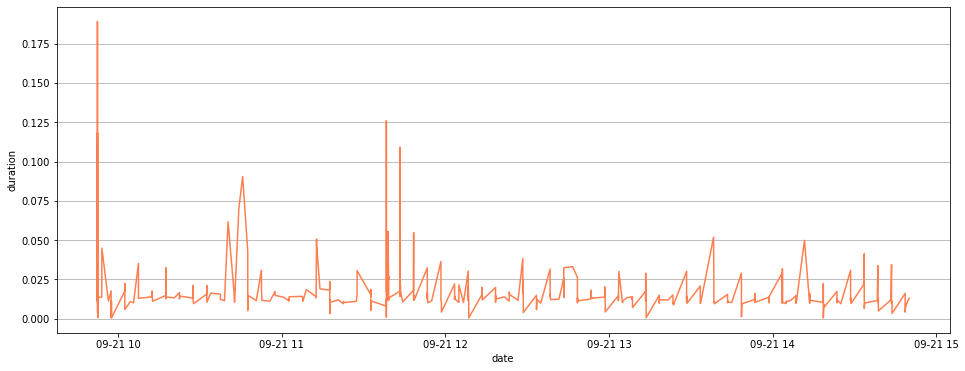

In [75]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="duration", data=amazon_echo_conn, color="coral")
plt.grid(axis='y')

### Number of bytes against time for the 192.168.2.3 - 192.168.2.1 pair

Text(0, 0.5, 'Number of bytes')

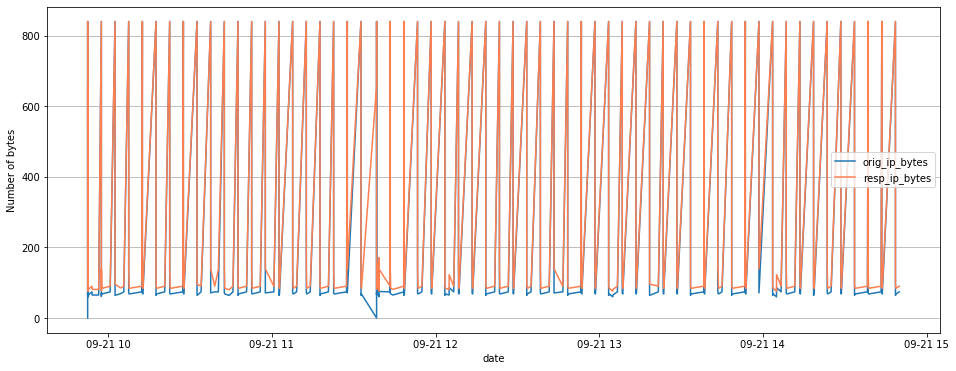

In [77]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_ip_bytes", data=amazon_echo_conn, label='orig_ip_bytes')
sns.lineplot(x="date", y="resp_ip_bytes", data=amazon_echo_conn, label='resp_ip_bytes', color="coral")
plt.grid(axis='y')
plt.ylabel("Number of bytes")

### Number of packets against time for the 192.168.2.3 - 192.168.2.1 pair

Text(0, 0.5, 'Number of packets')

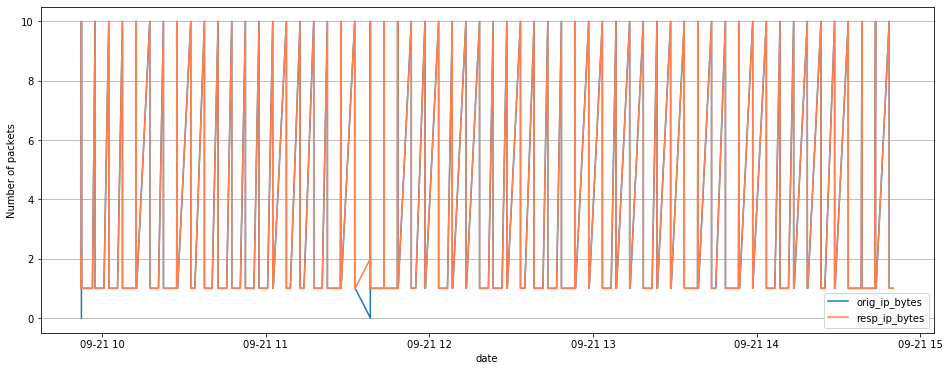

In [78]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets", data=amazon_echo_conn, label='orig_ip_bytes')
sns.lineplot(x="date", y="resp_packets", data=amazon_echo_conn, label='resp_ip_bytes', color="coral")
plt.grid(axis='y')
plt.ylabel("Number of packets")

### Originator's packets/sec and bytes/sec for the 192.168.2.3 - 192.168.2.1 pair

Text(0, 0.5, 'Originating Packets / sec')

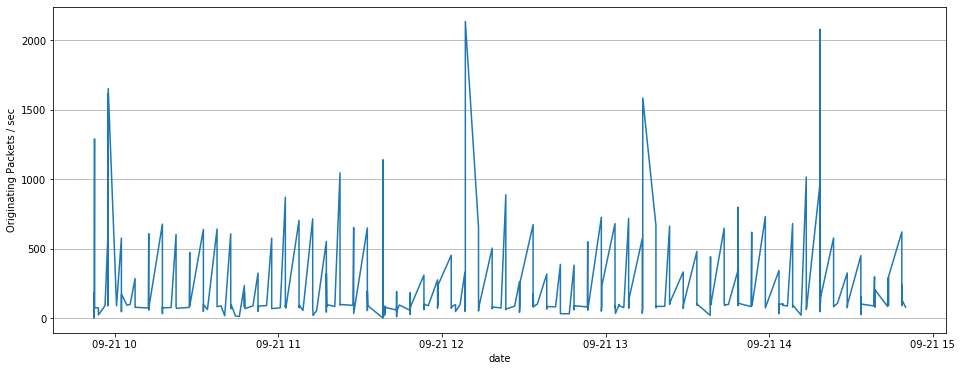

In [79]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets_per_s", data=amazon_echo_conn)
plt.grid(axis='y')
plt.ylabel("Originating Packets / sec")

Text(0, 0.5, 'Originating Bytes / sec')

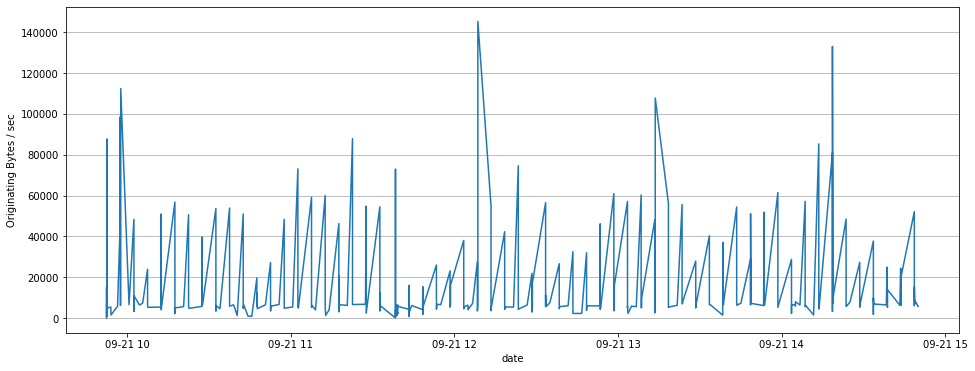

In [80]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_bytes_per_s", data=amazon_echo_conn)
plt.grid(axis='y')
plt.ylabel("Originating Bytes / sec")

### Responder's packets/sec and bytes/sec for the 192.168.2.3 - 192.168.2.1 pair

Text(0, 0.5, "Responder's Packets / sec")

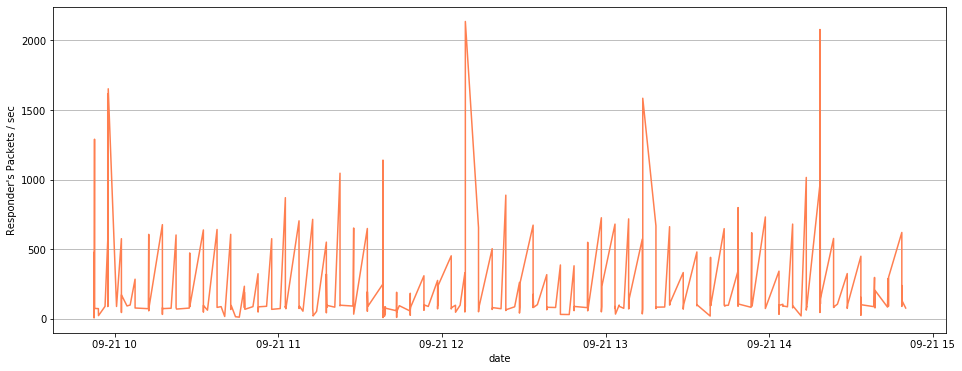

In [81]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="resp_packets_per_s", data=amazon_echo_conn, color="coral")
plt.grid(axis='y')
plt.ylabel("Responder's Packets / sec")

Text(0, 0.5, "Responder's Bytes / sec")

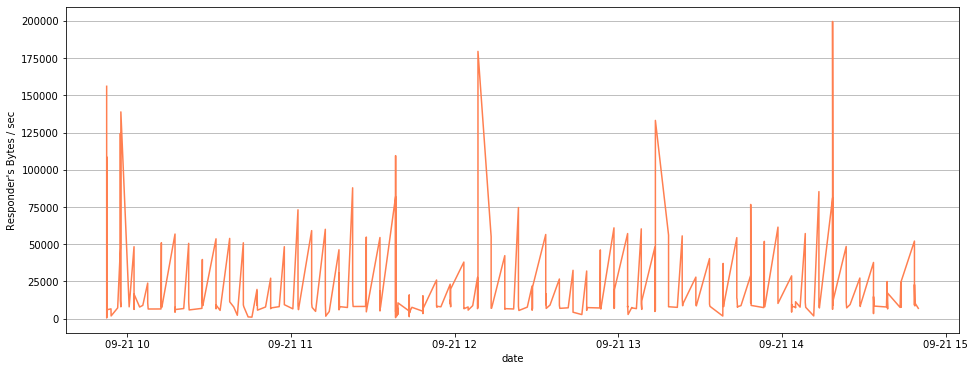

In [82]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="resp_bytes_per_s", data=amazon_echo_conn, color="coral")
plt.grid(axis='y')
plt.ylabel("Responder's Bytes / sec")

### Protocol distribution

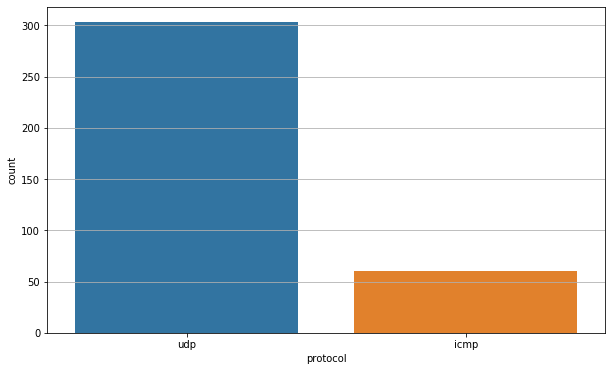

In [83]:
plt.figure(figsize=(10, 6))
sns.countplot(x="protocol", data=amazon_echo_conn)
plt.grid(axis='y')